In [96]:
import pandas
import numpy
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [62]:
data_all_years = pandas.read_csv('data_all.csv',sep=',')
data_all_years.head()
#data_all_years = data_all_years.drop(data_all_years.index[569])
#data_all_years = data_all_years.drop(data_all_years.index[569])
data_all_years[565:575]

last_name  first_name    year    xba   xslg  xwoba   xobp   xiso  \
565      Votto        Joey  2018.0  0.288  0.484  0.398  0.422  0.196   
566     Wendle        Joey  2018.0  0.264  0.378  0.312  0.326  0.115   
567     Yelich   Christian  2018.0  0.323  0.575  0.422  0.402  0.252   
568    Zobrist         Ben  2018.0  0.277  0.400  0.340  0.357  0.122   
571      Abreu        Jose  2019.0  0.282  0.522  0.363  0.335  0.240   
572  Acuna Jr.      Ronald  2019.0  0.282  0.578  0.393  0.368  0.296   
573     Adames       Willy  2019.0  0.254  0.446  0.326  0.317  0.192   
574      Ahmed        Nick  2019.0  0.261  0.432  0.326  0.327  0.171   
575    Alberto      Hanser  2019.0  0.283  0.401  0.308  0.309  0.119   
576     Albies       Ozzie  2019.0  0.292  0.497  0.356  0.350  0.205   

     exit_velocity_avg  launch_angle_avg    ...     popups  n_bolts  hp_to_1b  \
565               88.1              13.4    ...        4.0      0.0      4.72   
566               88.8              10.7    ...       28.0      0.0      4.16   
567               92.6               5.0    ...       13.0     47.0      4.18   
568               89.9               9.0    ...       14.0      0.0      4.36   
571               92.1              10.9    ...       29.0      0.0      4.47   
572               90.6              14.2    ...       21.0     47.0      4.18   
573               88.5              10.8    ...       16.0      0.0      4.27   
574               87.8               7.6    ...       20.0      2.0      4.35   
575               84.4              11.8    ...       26.0      0.0      4.33   
576               88.9              15.6    ...       28.0     20.0      4.02   

     sprint_speed                OPS_Plus_Name  OPS_Plus    UBR_Name  UBR  \
565          25.4        Joey Votto*\vottojo01     126.0       Votto -3.0   
566          28.3       Joey Wendle*\wendljo01     118.0      Wendle  1.3   
567          28.7  Christian Yelich*\yelicch01     164.0      Yelich  4.2   
568          26.7       Ben Zobrist#\zobribe01     117.0     Zobrist  1.9   
571          26.6              Abreu\abreujo02     118.0       Abreu -3.0   
572          29.4          Acuna Jr.\acunaro01     121.0   Acuna Jr.  4.6   
573          28.3             Adames\adamewi01      96.0      Adames  1.8   
574          28.2              Ahmed\ahmedni01      92.0       Ahmed  2.4   
575          26.8            Alberto\alberha01      98.0     Alberto -0.2   
576          28.6            Albies#\albieoz01     113.0      Albies  1.6   

     wRC_Plus_Name  wRC_Plus  
565          Votto     130.0  
566         Wendle     117.0  
567         Yelich     166.0  
568        Zobrist     123.0  
571          Abreu     117.0  
572      Acuna Jr.     126.0  
573         Adames      97.0  
574          Ahmed      91.0  
575        Alberto      96.0  
576         Albies     117.0  

[10 rows x 65 columns]

In [9]:
predictors = ['exit_velocity_avg', 'launch_angle_avg', 'sweet_spot_percent', 'barrels', 'barrel_batted_rate','solidcontact_percent', 'flareburner_percent', 'poorlyunder_percent', 'poorlytopped_percent', 'poorlyweak_percent', 'hard_hit_percent', 'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent', 'oz_swing_miss_percent', 'oz_contact_percent', 'out_zone_swing_miss', 'out_zone_swing', 'out_zone_percent', 'out_zone', 'meatball_swing_percent', 'meatball_percent','pitch_count_offspeed', 'pitch_count_fastball', 'pitch_count_breaking', 'pitch_count','iz_contact_percent', 'in_zone_swing_miss', 'in_zone_swing', 'in_zone_percent', 'in_zone', 'edge_percent', 'edge', 'whiff_percent', 'swing_percent', 'pull_percent', 'straightaway_percent', 'opposite_percent', 'batted_ball', 'f_strike_percent', 'groundballs_percent', 'groundballs','flyballs_percent', 'flyballs', 'linedrives_percent', 'linedrives', 'popups_percent', 'popups', 'n_bolts', 'sprint_speed', 'UBR']
len(predictors)

51

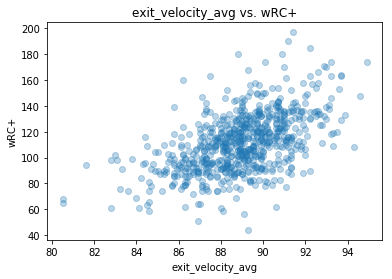

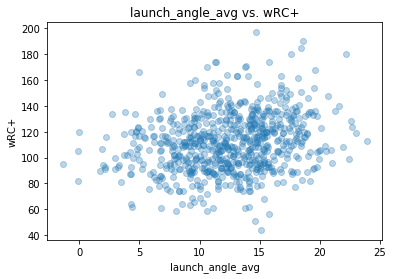

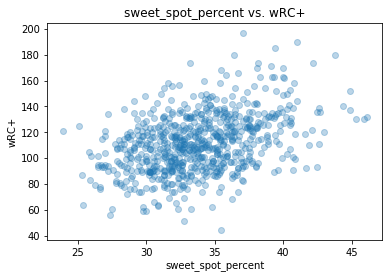

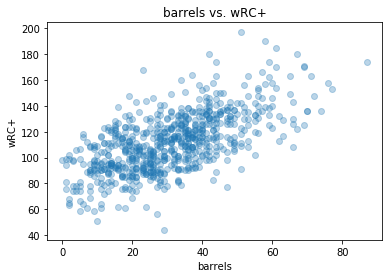

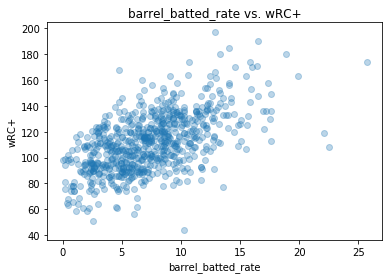

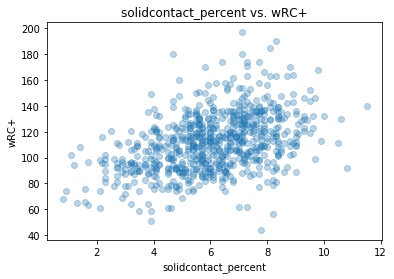

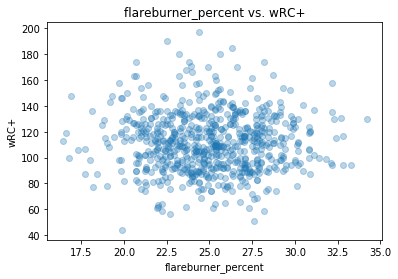

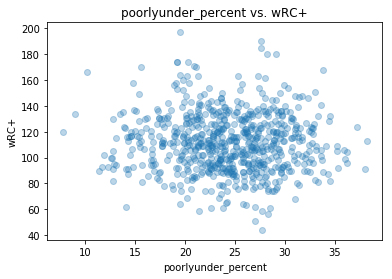

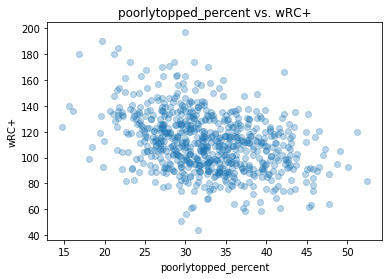

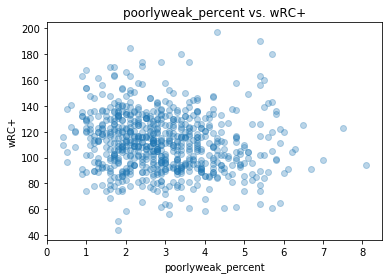

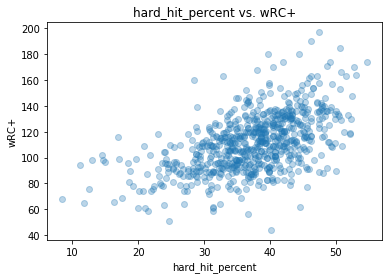

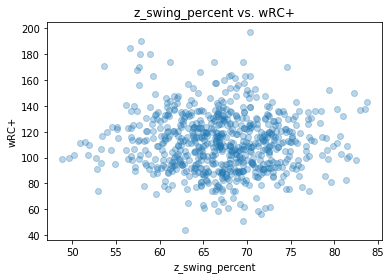

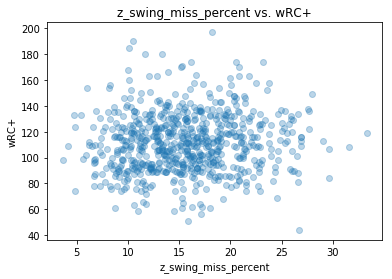

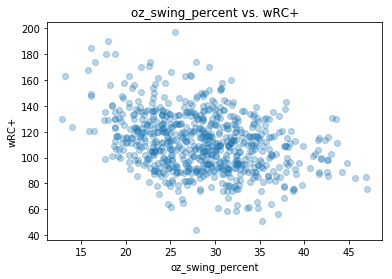

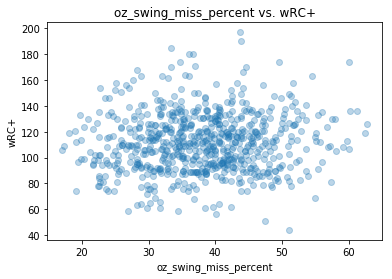

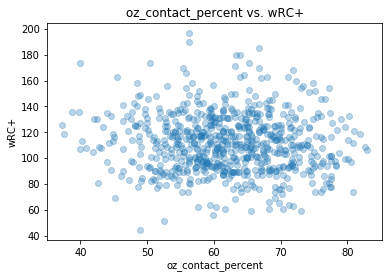

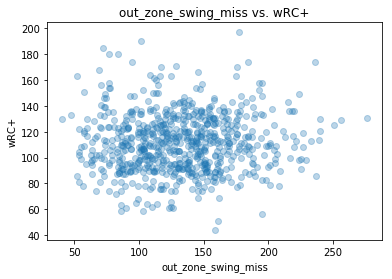

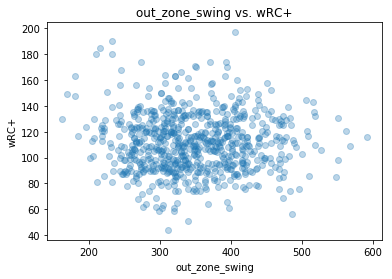

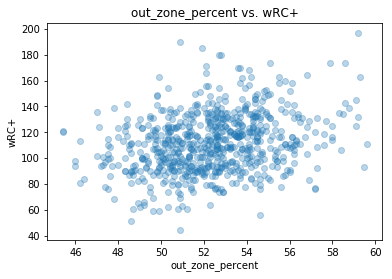

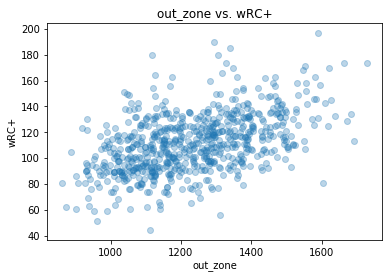

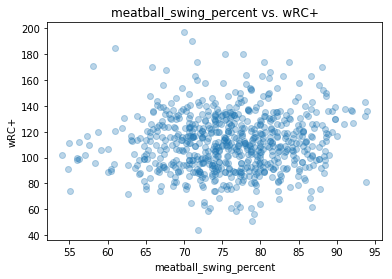

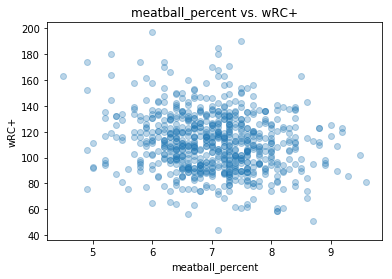

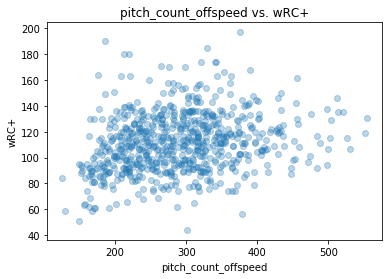

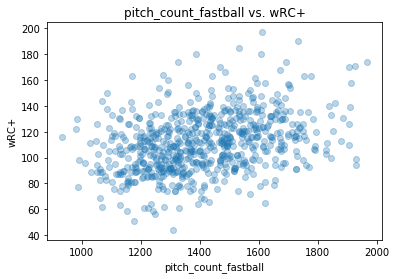

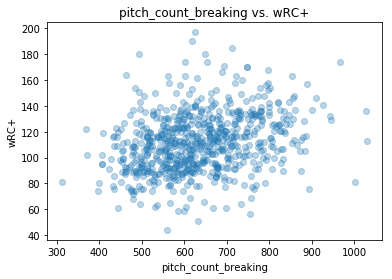

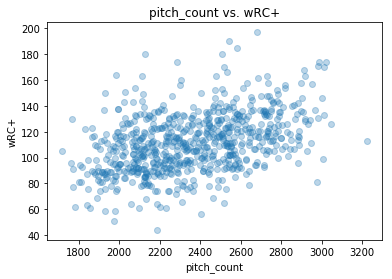

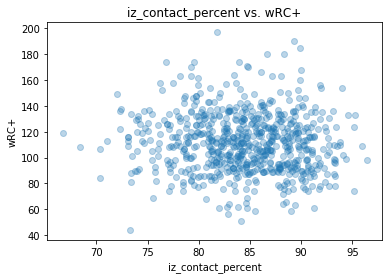

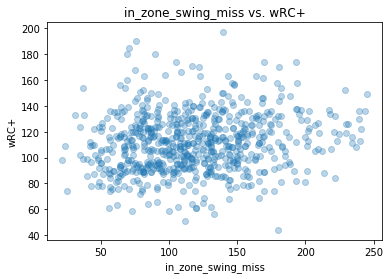

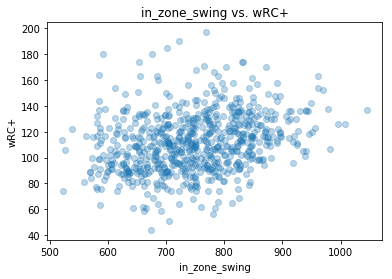

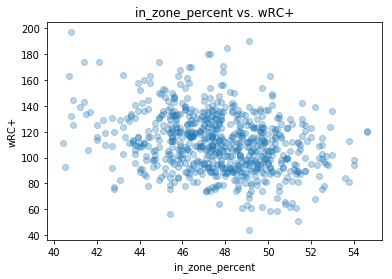

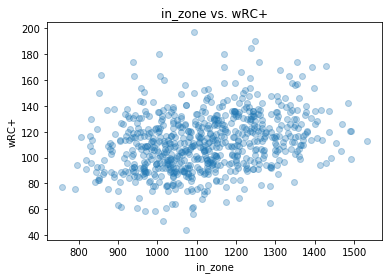

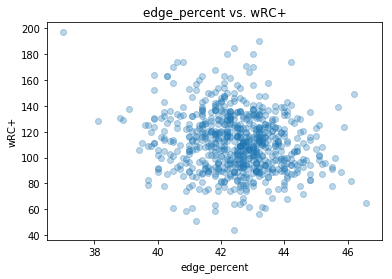

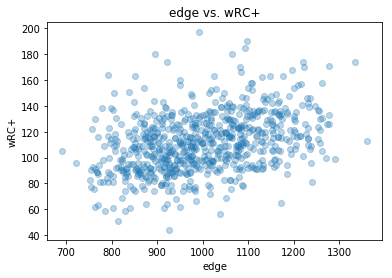

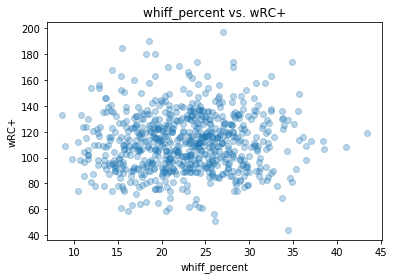

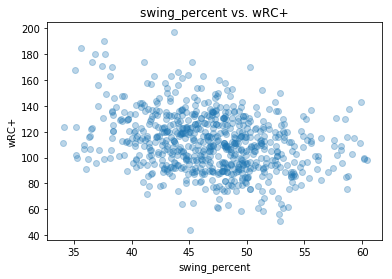

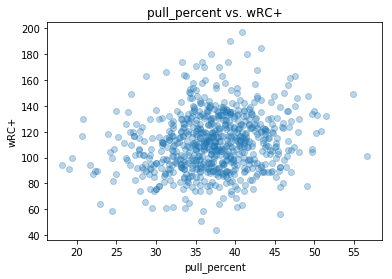

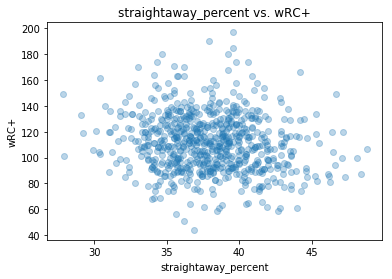

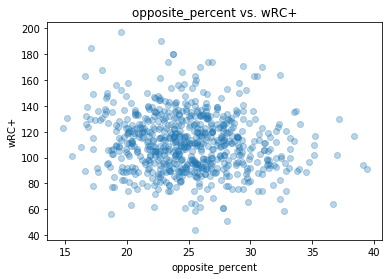

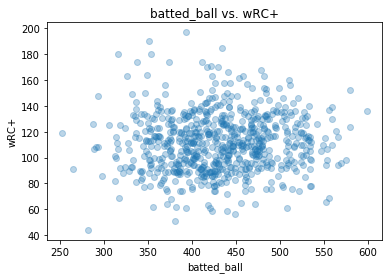

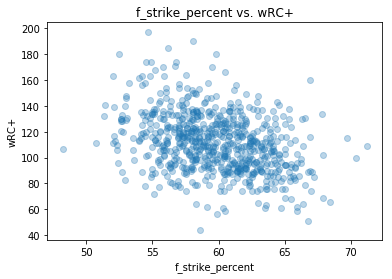

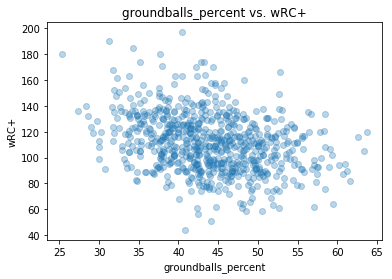

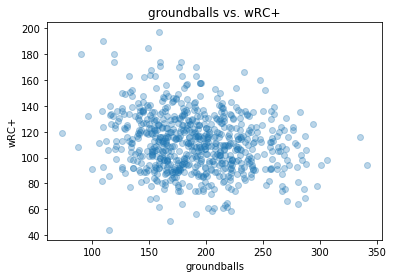

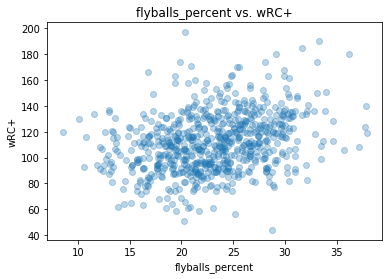

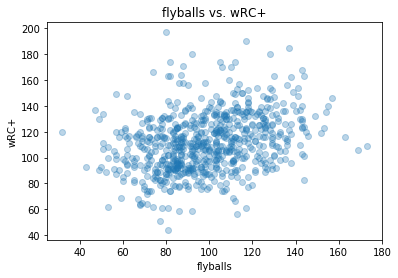

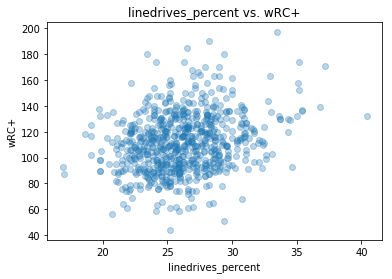

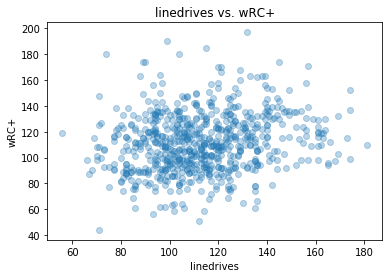

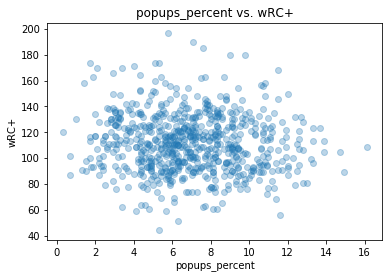

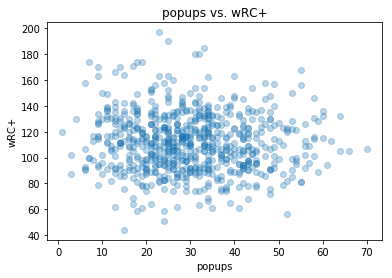

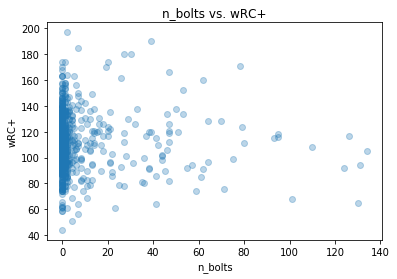

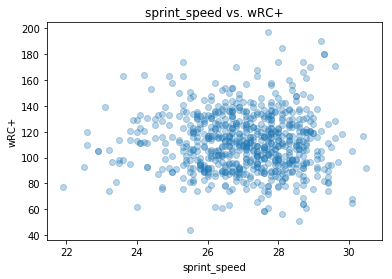

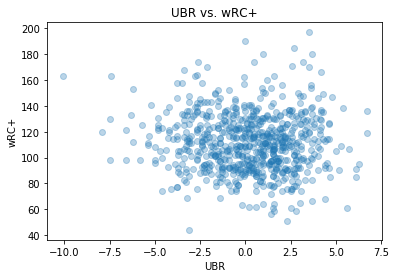

In [16]:
i = 0
for x in predictors:
    plt.figure(i)
    plt.scatter(data_all_years[x], data_all_years['wRC_Plus'],alpha=0.3)
    plt.xlabel(x)
    plt.ylabel('wRC+')
    plt.title(x + ' vs. wRC+')
    i = i + 1

In [65]:
wrc_plus_preds = numpy.array(data_all_years[['exit_velocity_avg','launch_angle_avg','barrels','solidcontact_percent','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','pitch_count','edge','swing_percent','groundballs_percent','flyballs_percent']])

array([ 2.32367017e+00, -2.68205345e+00,  8.39110195e-01, -2.39460719e-01,
       -1.12620892e+00, -6.79330975e-01, -8.09635875e-01,  3.59198493e-02,
        1.49897227e-04, -4.18963228e-02, -3.38851820e-01, -1.48056423e+00,
       -1.24620664e+00])

In [92]:
wrc_plus_model = sm.OLS(data_all_years['wRC_Plus'],wrc_plus_preds)
wrc_plus_model_results = wrc_plus_model.fit()
print(wrc_plus_model_results.tvalues)
print(wrc_plus_model_results.pvalues)

x1     10.766287
x2     -4.483636
x3      9.450780
x4     -0.399503
x5     -3.506382
x6     -4.574817
x7     -3.652141
x8      2.856273
x9      0.089557
x10    -1.946977
x11    -0.862355
x12    -3.668889
x13    -4.284039
dtype: float64
x1     4.273478e-25
x2     8.590076e-06
x3     5.104534e-20
x4     6.896461e-01
x5     4.836132e-04
x6     5.649622e-06
x7     2.797260e-04
x8     4.415184e-03
x9     9.286653e-01
x10    5.194229e-02
x11    3.887912e-01
x12    2.623533e-04
x13    2.095551e-05
dtype: float64


In [98]:
wrc_plus_preds_red = numpy.array(data_all_years[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent']])

In [101]:
wrc_plus_model_red = sm.OLS(data_all_years['wRC_Plus'],wrc_plus_preds_red)
wrc_plus_model_red_results = wrc_plus_model_red.fit()
print(wrc_plus_model_red_results.tvalues)
print(wrc_plus_model_red_results.pvalues)

x1     11.021786
x2     -4.446896
x3      9.743062
x4     -3.433898
x5     -5.117865
x6     -7.919023
x7      4.245991
x8     -3.568636
x9     -3.716143
x10    -4.558571
dtype: float64
x1     3.823180e-26
x2     1.014258e-05
x3     4.134192e-21
x4     6.303332e-04
x5     4.005032e-07
x6     9.511954e-15
x7     2.472654e-05
x8     3.835546e-04
x9     2.185718e-04
x10    6.086467e-06
dtype: float64


In [103]:
anovatest = anova_lm(wrc_plus_model_red_results, wrc_plus_model_results)
print(anovatest)

   df_resid            ssr  df_diff     ss_diff         F    Pr(>F)
0     694.0  170505.216947      0.0         NaN       NaN       NaN
1     691.0  170261.011770      3.0  244.205177  0.330367  0.803404


Final Model: wRC_Plus ~ exit_velocity_avg + launch_angle_avg + barrels + poorlytopped_percent + hard_hit_percent + oz_swing_percent + out_zone + edge + groundballs_percent + flyballs_percent